# Dataset analysis 

In [143]:
import numpy as np
import scipy.ndimage.morphology as morph
import math
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib import  cm
from typing import Dict

In [144]:
def clean_mask(volume : np.ndarray, iterations : int = 1):
    """ Function to clean up a mask
    """
    def remove_noise(volume, iterations):
        struct = morph.generate_binary_structure(3, 3)
        return morph.binary_erosion(
            morph.binary_closing(
                morph.binary_opening(volume, structure=struct, iterations = iterations)
                , structure=struct, iterations = iterations
            ), structure=struct, iterations = 2
        )
    
    temp = np.zeros((*volume.shape, 6), dtype = int)
    for i in range(6):
        temp[:,:,:, i] = remove_noise((volume==i), iterations)

    volume = np.argmax(temp, axis = 3)
    return volume



In [145]:
def plot_volumes(volumes : Dict, title : str, savename = '3d_reconstruct.png'):
    plt.figure(figsize=(10,10))
    for i in [0,1, 2]:
            for j in range(3):
                plt.subplot(3,3,i*3+j+1)
                plt.imshow(cm.gist_stern_r(np.take(volumes[i], volumes[i].shape[j]//2, axis=j)*51))
                #plt.axis('off')
                plt.title(f'Result model axis {i}\nsliced along axis {j}')
    plt.suptitle(title)
    plt.savefig(savename)            
    plt.tight_layout()
    plt.show()

def plot_ground_truth(ground_truth : np.ndarray, savename : str = '3d_reconstruct_gt.png'):
    plt.figure(figsize=(10,5))
    for j in range(3):
        plt.subplot(1,3,j+1)
        plt.imshow(cm.gist_stern_r(np.take(ground_truth, ground_truth.shape[j]//2, axis=j)*51))
        plt.suptitle('Ground truth')
        plt.title(f'slice along axis {j}')
    plt.tight_layout()
    plt.savefig(savename)
    plt.show()  

def occurance_counts(volumes : np.ndarray, ground_truth : np.ndarray) -> pd.DataFrame:
    volumes_stack = np.stack([ground_truth] + [volumes[i] for i in range(3)], axis = 3)
    occurance_counts = pd.DataFrame()
    for i in range(6):
        overlay = ground_truth == i
        cnts = np.unique(volumes_stack[overlay], axis=0, return_counts = True)
        counts_frame = pd.DataFrame(cnts[0], columns=['ground_truth', 'm0', 'm1', 'm2'])
        counts_frame['counts'] = cnts[1]
        occurance_counts = occurance_counts.append(counts_frame)
    occurance_counts = occurance_counts.pivot(index=['m0', 'm1', 'm2'], columns='ground_truth', values='counts')
    return occurance_counts
    

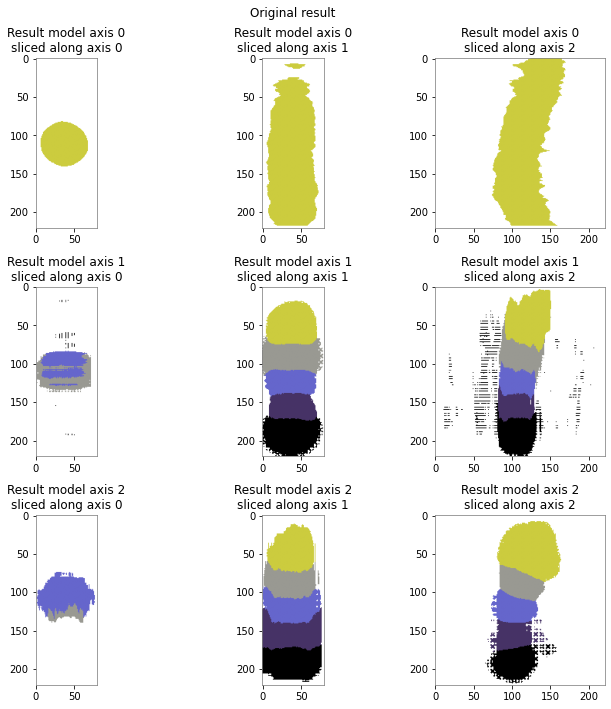

dimension from file scan_MyoSegmenTUM_043_res.npy
	from dim 0 : shape (221, 221, 80).
	from dim 1 : shape (221, 221, 80).
	from dim 2 : shape (221, 221, 80).
	




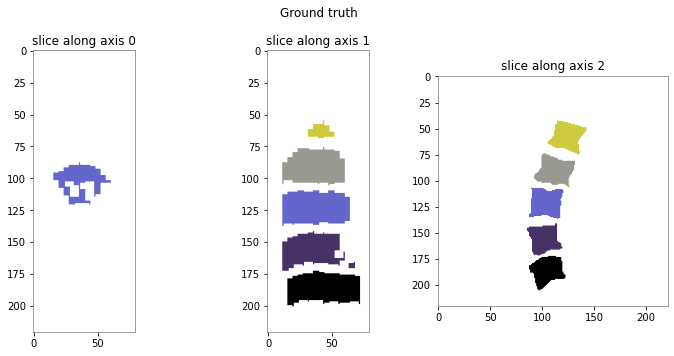

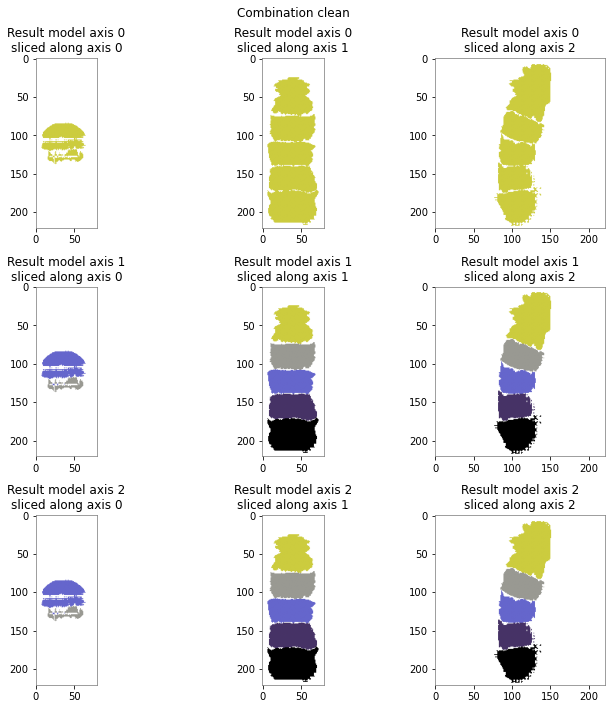

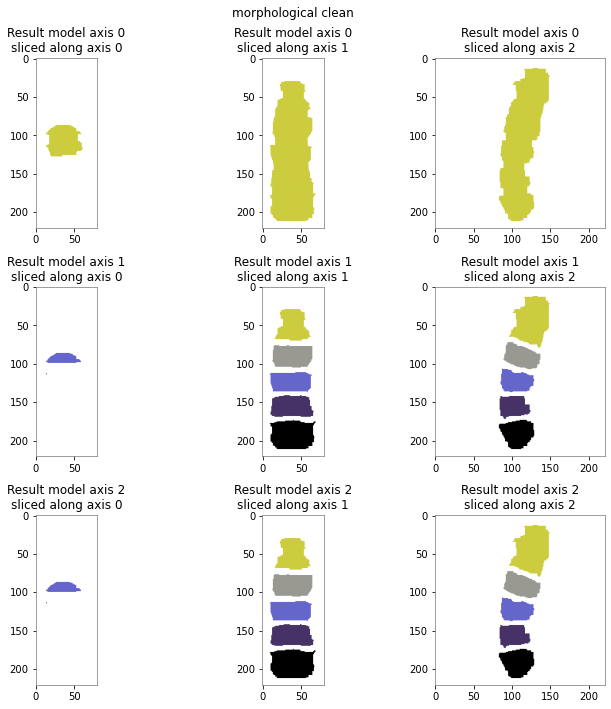

ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3467489.0      NaN     84.0    285.0   1204.0   1395.0
1  1  1        108670.0  24212.0      NaN      NaN      NaN      NaN
   2  2         46912.0      NaN  29588.0      5.0      NaN      NaN
   3  3         33527.0      NaN      NaN  31549.0      NaN      NaN
   4  4         41349.0      NaN      NaN      NaN  29590.0      NaN
   5  5         64075.0      NaN      NaN      NaN      NaN  27346.0
ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3576016.0    113.0    845.0   1594.0   3658.0   3015.0
1  0  0         35255.0     18.0   1037.0   1907.0    624.0    729.0
   1  1         68002.0  24081.0      NaN      NaN      NaN      NaN
   2  2         20392.0      NaN  27790.0      NaN      NaN      NaN
   3  3         13369.0      NaN  

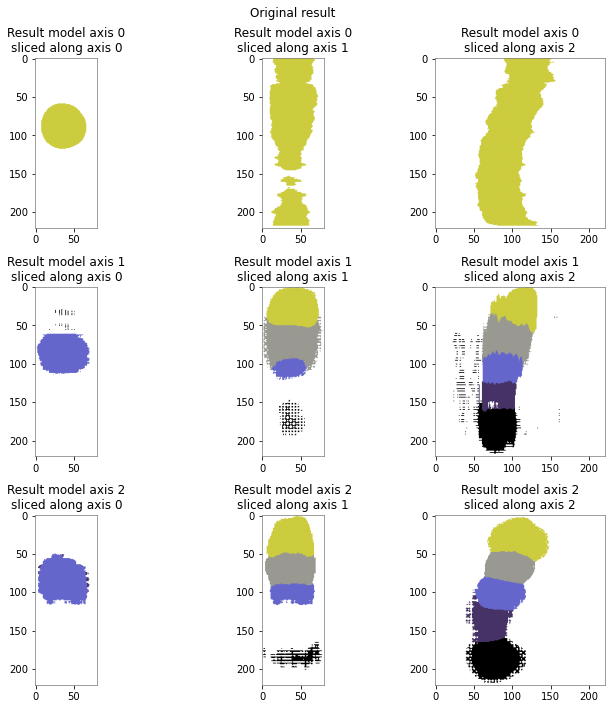

dimension from file scan_MyoSegmenTUM_016_res.npy
	from dim 0 : shape (221, 221, 81).
	from dim 1 : shape (221, 221, 81).
	from dim 2 : shape (221, 221, 81).
	




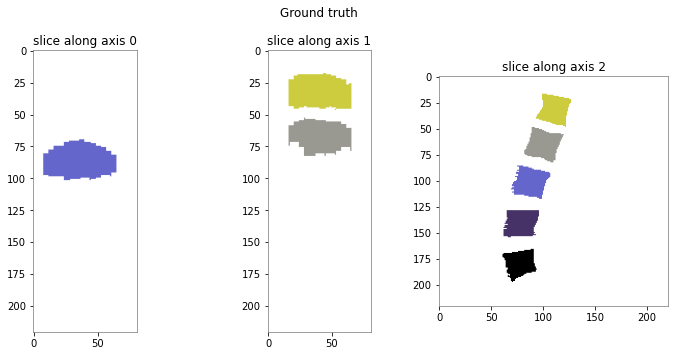

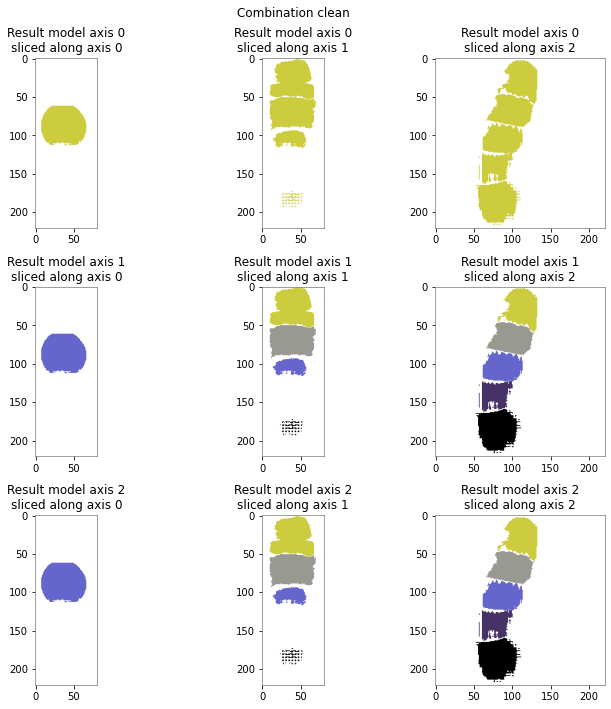

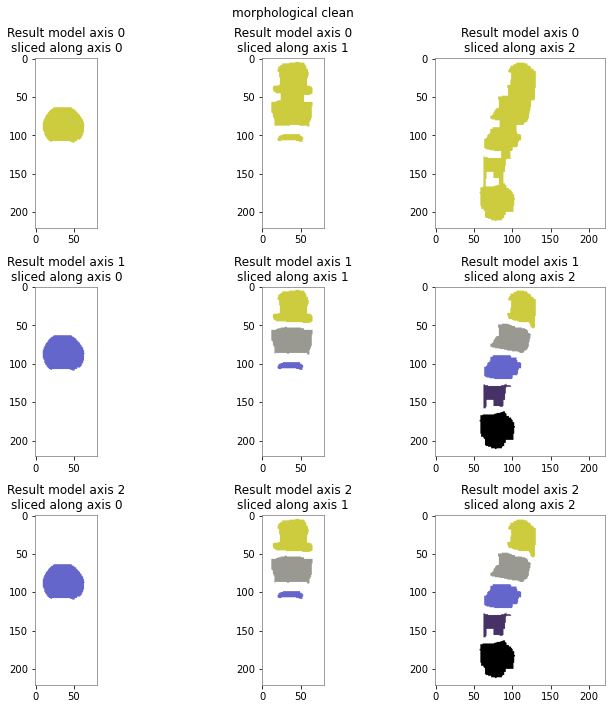

ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3541569.0    814.0     16.0    399.0   1633.0      NaN
1  1  1         51056.0  26307.0      NaN      NaN      NaN      NaN
   2  2         58943.0      NaN  30816.0      NaN      NaN      NaN
   3  3         44988.0      NaN      NaN  34399.0      NaN      NaN
   4  4         26051.0      NaN      NaN      NaN  29809.0      NaN
   5  5         87512.0      NaN      NaN      NaN      NaN  21809.0
ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3655540.0   2457.0    371.0   2556.0   7282.0     11.0
1  0  0         26587.0     71.0    242.0    628.0    554.0      NaN
   1  1         24191.0  24593.0      NaN      NaN      NaN      NaN
   2  2         28305.0      NaN  30219.0      NaN      NaN      NaN
   3  3         20880.0      NaN  

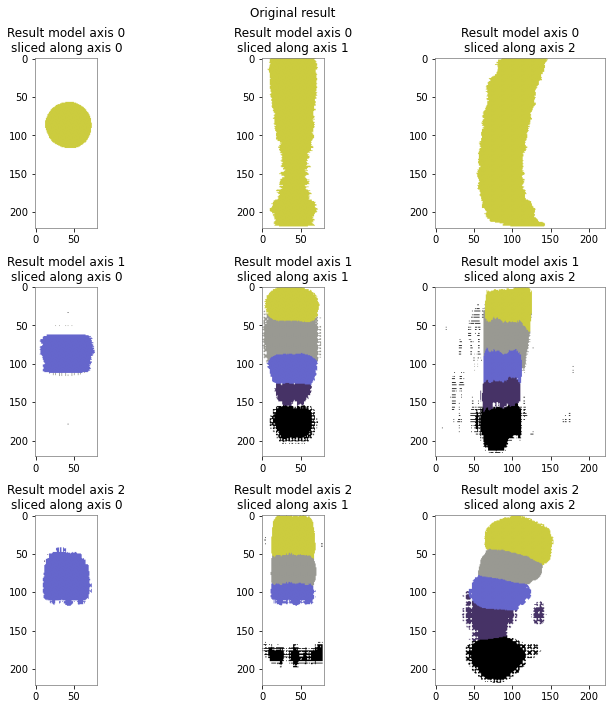

dimension from file scan_MyoSegmenTUM_014_res.npy
	from dim 0 : shape (221, 221, 81).
	from dim 1 : shape (221, 221, 81).
	from dim 2 : shape (221, 221, 81).
	




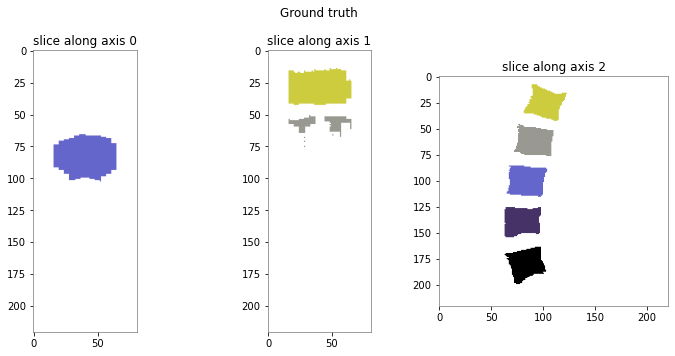

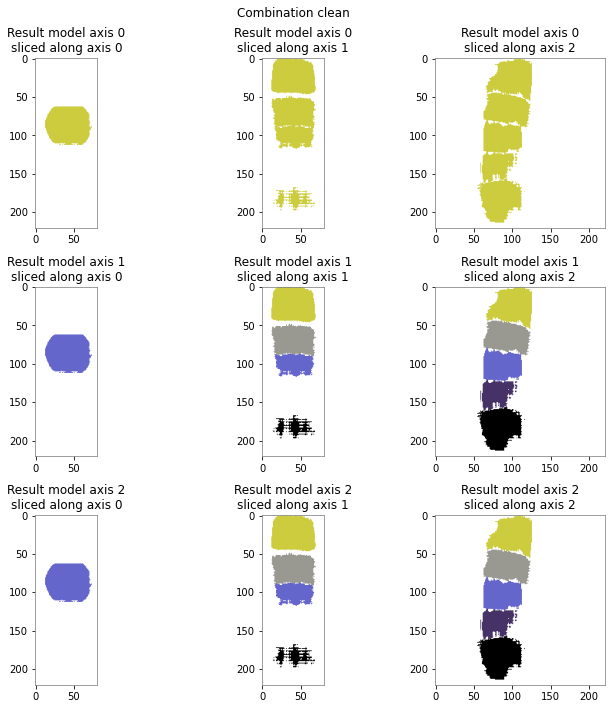

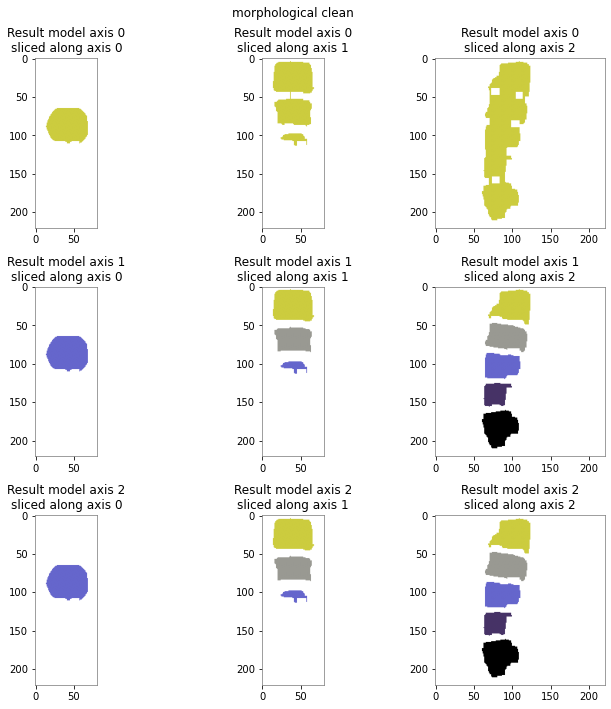

ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3491539.0      NaN    207.0     84.0   1297.0      NaN
1  1  1         70338.0  35276.0      1.0      NaN      NaN      NaN
   2  2         58820.0      NaN  37507.0      1.0      NaN      NaN
   3  3         50883.0      NaN      NaN  38187.0      NaN      NaN
   4  4         27047.0      NaN      NaN      NaN  39642.0      NaN
   5  5         69798.0      NaN      NaN      NaN      NaN  35494.0
ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3616359.0    111.0   1482.0   1361.0   6298.0    494.0
1  0  0         28093.0      NaN   1365.0   1060.0    302.0      9.0
   1  1         36312.0  35165.0      NaN      NaN      NaN      NaN
   2  2         28276.0      NaN  34868.0      NaN      NaN      NaN
   3  3         24012.0      NaN  

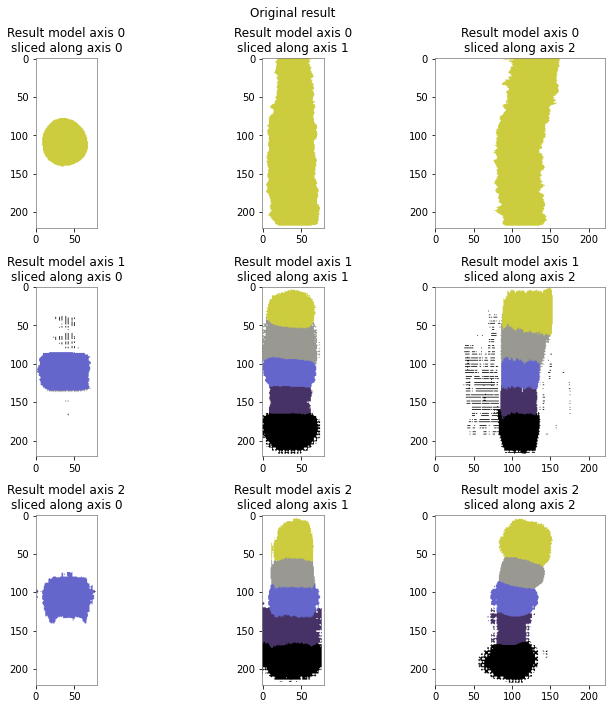

dimension from file scan_MyoSegmenTUM_046_res.npy
	from dim 0 : shape (221, 221, 80).
	from dim 1 : shape (221, 221, 80).
	from dim 2 : shape (221, 221, 80).
	




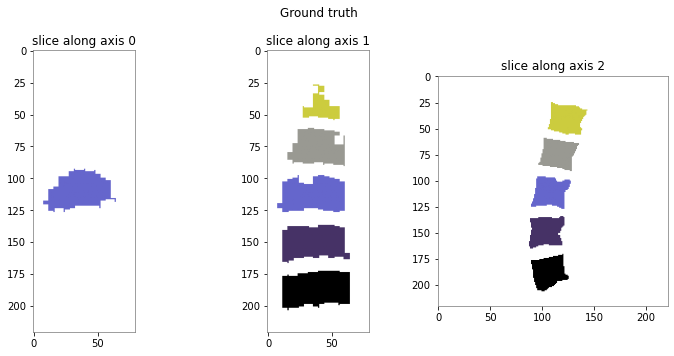

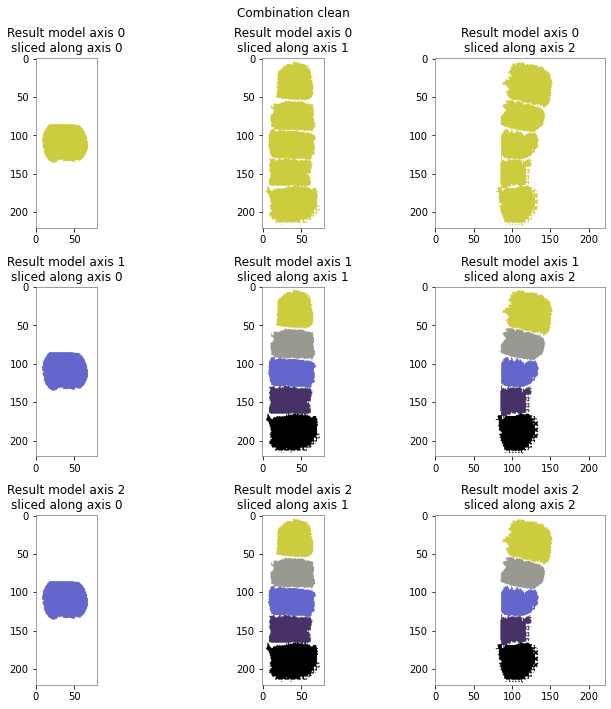

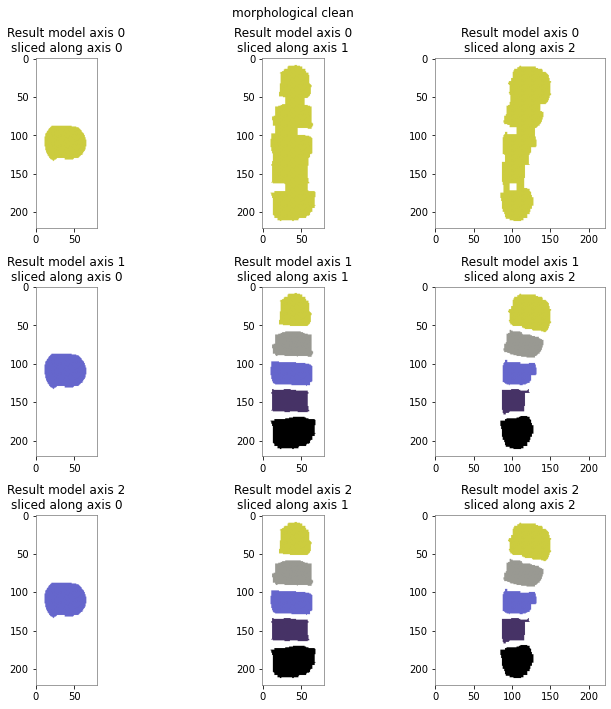

ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3453598.0      4.0     14.0    248.0    490.0    132.0
1  1  1         87663.0  29237.0      NaN      NaN      NaN      NaN
   2  2         50776.0      NaN  31894.0      NaN      NaN      NaN
   3  3         49166.0      NaN      NaN  31114.0      NaN      NaN
   4  4         37924.0      NaN      NaN      NaN  32487.0      NaN
   5  5         70145.0      NaN      NaN      NaN      NaN  32388.0
ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3578832.0    607.0    566.0   1579.0   2426.0   1163.0
1  0  0         29320.0    249.0    245.0    216.0    127.0      NaN
   1  1         52607.0  28385.0      NaN      NaN      NaN      NaN
   2  2         22990.0      NaN  31097.0      NaN      NaN      NaN
   3  3         22208.0      NaN  

In [146]:
res_folder = r'/media/jan/DataStorage/ProjectData/temp/'
folder_3d = os.path.join(res_folder, r'3D_reconstruct_test')

dataset_1 = os.path.join(res_folder, r'dataset_1_contrast_3')

splits = ['val', 'train']
dims = [0,1, 2]
foldername = 'dimension_D_split_S'

for split in splits:
    foldernames = [foldername.replace('S', split).replace('D', str(d)) for d in dims]
    counter = 0
    for file_name in os.listdir(os.path.join(folder_3d, foldernames[0])):
        if not file_name.endswith('_res.npy'):
            continue
        if counter > 1:
            break

        volumes = {i : np.load(os.path.join(folder_3d, fn, file_name)) for i, fn in enumerate(foldernames)}
        output = [f'dimension from file {file_name}']
        output += [f'from dim {i} : shape {volumes[i].shape}.' for i in range(3)]
        output += ['\n\n']
        plot_volumes(volumes, 'Original result')
                
        print('\n\t'.join(output))
        counter += 1

        _, source, nr, _ = file_name.split('_')
        mask_filename = os.path.join(dataset_1, f'{source}_masks', f'image{nr}', 'mask_array.npy')
        ground_truth = np.load(mask_filename)
        plot_ground_truth(ground_truth)
        
        background_mask = (volumes[0] == 0)  | (volumes[1] == 0) | (volumes[2] == 0) | (volumes[1] != volumes[2])
        volumes = {i : np.where(background_mask, 0, volumes[i]) for i in range(3)}
        plot_volumes(volumes, 'Combination clean')


        volumes_cleaned = {i : clean_mask(volumes[i], iterations=2) for i in range(3)}
        plot_volumes(volumes_cleaned, 'morphological clean')

        print(occurance_counts(volumes, ground_truth))
        print(occurance_counts(volumes_cleaned, ground_truth))

        print('\n\n*********************************************************************\n\n+')


